<a href="https://colab.research.google.com/github/asadali163/Computer-Vision-Projects/blob/main/codebase/CV_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### In this notebook, we will cover the basics of detecting face in an image

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Load image with link
img = cv.imread('person.jpg')
# Let's convert it to Gray for faster processing
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [3]:
img.shape

(257, 196)

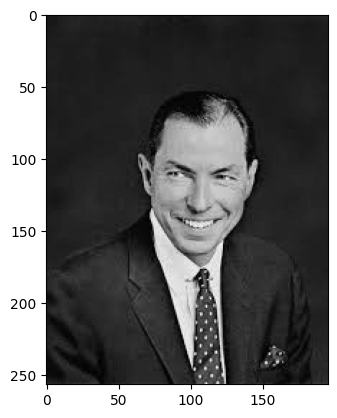

In [4]:
# show image with color cmap
plt.imshow(img, cmap='gray');

In [5]:
### First, we will download the cascade classifier xml file
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


--2024-08-10 15:04:52--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.005s  

2024-08-10 15:04:52 (180 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [6]:
!ls

haarcascade_frontalface_default.xml  multiple_persons.jpg  person.jpg  sample_data


In [7]:
# Load classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [8]:
faces = face_cascade.detectMultiScale(img)

In [9]:
faces

array([[67, 78, 83, 83]], dtype=int32)

As it return 1 array, so it means it has detected a single face<br>
Let's create a bounding boxes around them. <b>Make sure, it changes the original image</b>

In [10]:
for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 255), 2)

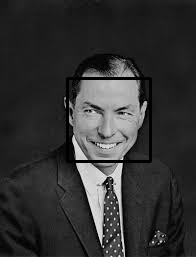

In [11]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

Now let's detect faces in an image that has multiple persons

In [12]:
img2 = cv.imread('multiple_persons.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

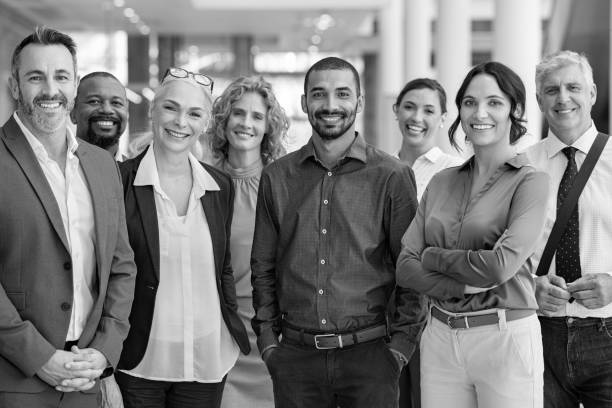

In [13]:
cv2_imshow(img2)

In [14]:
detections = face_cascade.detectMultiScale(img2)

In [15]:
len(detections)

9

As we have 8 persons, but we got 9. Something is wrong here

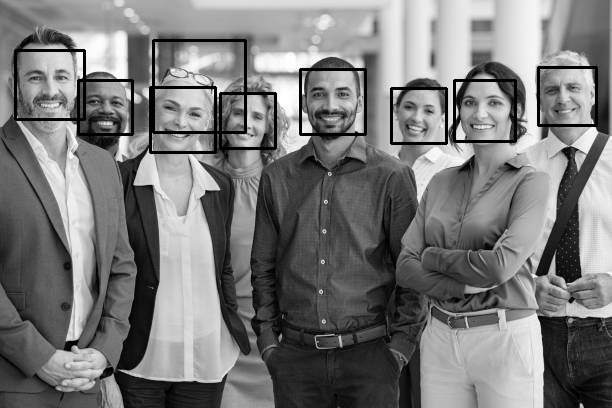

In [16]:
for (x, y, w, h) in detections:
    cv.rectangle(img2, (x, y), (x+w, y+h), (0,0,245), 2)
cv2_imshow(img2)

As shown we have got one False Positive. So for that we need to set one parameter called scaleFactor. <br>
As if the faces are large, this value need to be large and vice versa. Large faces mean taken shots from short distance

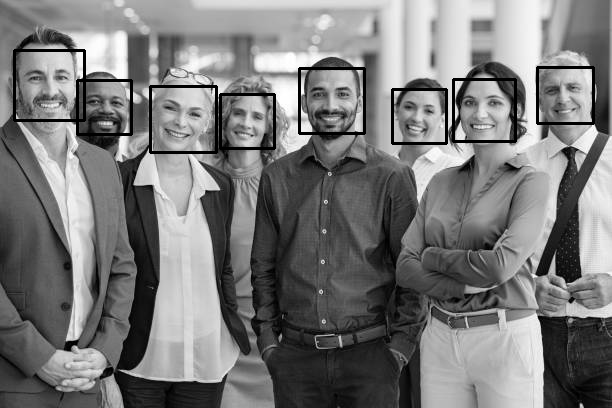

In [17]:
# This is trail and error process.
img2 = cv.imread('multiple_persons.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
detections = face_cascade.detectMultiScale(img2, scaleFactor=1.15)
# Values I have tried 1.1, 1.01(good for small faces), 1.06, 1.09, 1.15(works fine)
for (x, y, w, h) in detections:
    cv.rectangle(img2, (x, y), (x+w, y+h), (0,0,245), 2)
cv2_imshow(img2)

Other parameters we have to considered and are important is minNeighbours, minSize, and maxSize

In [18]:
# Ok, now let's detect eyes as well
# download the eye classifier
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml

--2024-08-10 15:04:53--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [text/plain]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.003s  

2024-08-10 15:04:53 (96.9 MB/s) - ‘haarcascade_eye.xml’ saved [341406/341406]



In [19]:
eye_detector = cv.CascadeClassifier('haarcascade_eye.xml')

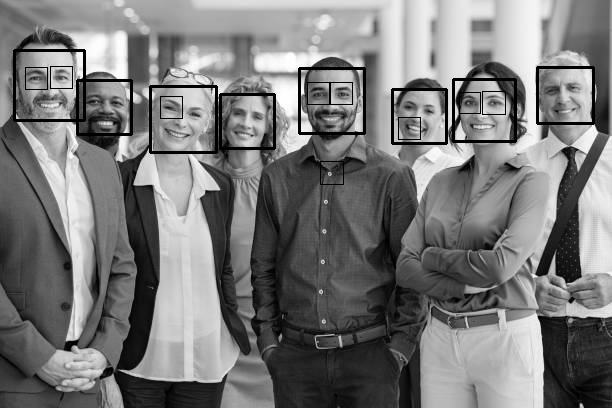

In [20]:
img3 = cv.imread('multiple_persons.jpg')
img3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
# Let's detect faces first
face_detections = face_cascade.detectMultiScale(img3, scaleFactor=1.15)
for (x, y, w, h) in face_detections:
    cv.rectangle(img3, (x, y), (x+w, y+h), (0,255,0), 2)
# Let's detect eyes as well
eye_detections = eye_detector.detectMultiScale(img3, scaleFactor=1.05, maxSize=(30,30) )
for (x, y, w, h) in eye_detections:
    cv.rectangle(img3, (x, y), (x+w, y+h), (0,255,0), 1)
cv2_imshow(img3)

### Now, lets detect faces using Histogram of Oriented Gradients (HOG)

In [21]:
import dlib

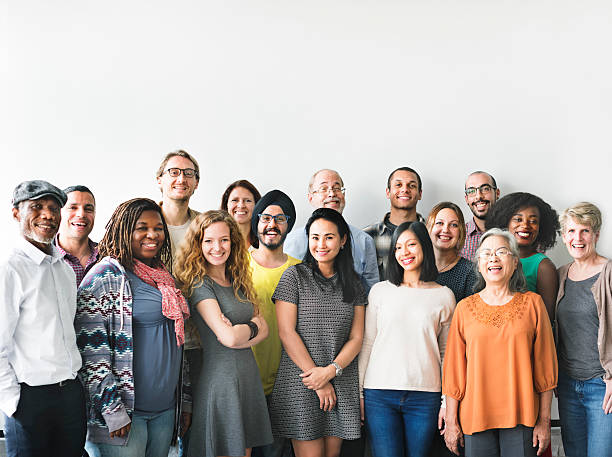

In [26]:
image = cv.imread('all_persons.jpg')
cv2_imshow(image)

As there is 16 faces, Now let's try to detect the cascade and HOG

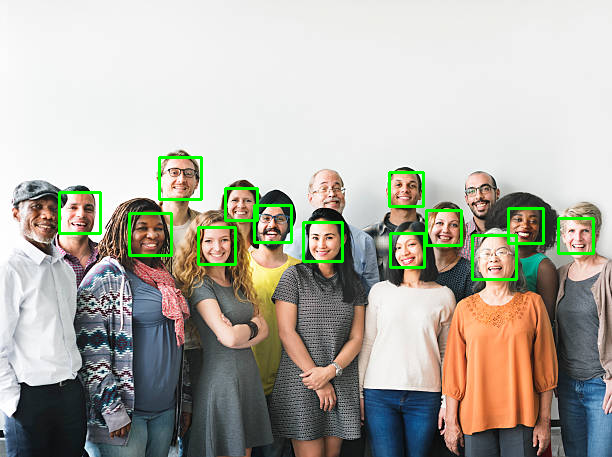

In [32]:
image = cv.imread('all_persons.jpg')
detections = face_cascade.detectMultiScale(image, scaleFactor=1.05, minNeighbors=10, maxSize=(50,50))
for (x, y, w, h) in detections:
    cv.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 2)
cv2_imshow(image)

As you can see it still struggle with some faces

In [33]:
# Not let's try HOG
hog_face_detector = dlib.get_frontal_face_detector()

In [47]:
image = cv.imread('all_persons.jpg')
detections = hog_face_detector(image, 2)

In [48]:
len(detections)

15

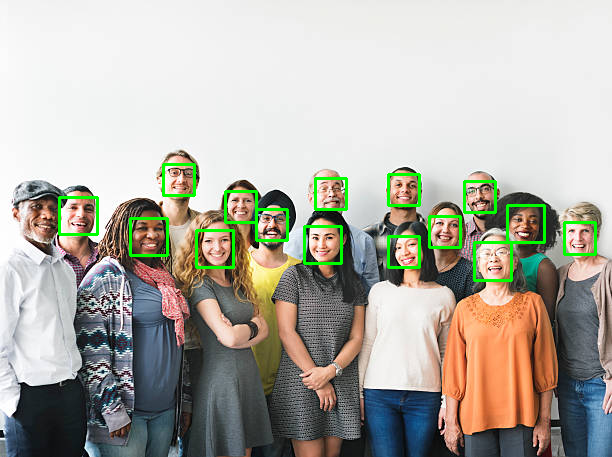

In [49]:
for d in detections:
    l, t, r, b = d.left(), d.top(), d.right(), d.bottom()
    cv.rectangle(image, (l, t), (r, b), (0, 255, 0), 2)
cv2_imshow(image)

### Now let's try with CNN Detector

In [51]:
# Download cnn detector
!wget https://github.com/davisking/dlib-models/raw/master/mmod_human_face_detector.dat.bz2

--2024-08-10 15:22:41--  https://github.com/davisking/dlib-models/raw/master/mmod_human_face_detector.dat.bz2
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davisking/dlib-models/master/mmod_human_face_detector.dat.bz2 [following]
--2024-08-10 15:22:41--  https://raw.githubusercontent.com/davisking/dlib-models/master/mmod_human_face_detector.dat.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694687 (678K) [application/octet-stream]
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.41K  --.-KB/s    in 0.007s  

2024-08-10 15:22:42 (101 MB/

In [54]:
# Let's now first decompress the file
!bunzip2 mmod_human_face_detector.dat.bz2

In [55]:
# Now cnn detector loading
cnn_face_detector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')

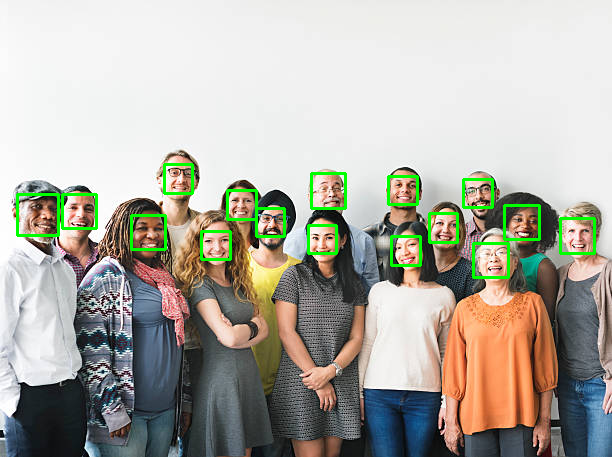

In [61]:
image = cv.imread('all_persons.jpg')
detection = cnn_face_detector(image, 2)
for d in detection:
    l, t, r, b = d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom()
    cv.rectangle(image, (l, t), (r, b), (0, 255, 0), 2)
cv2_imshow(image)

As you can see this has detected correctly

### Now let's try to detect face using web cam

As coolab is not designed for real time processing. The below code is work fine for any id like pyCharm

In [ ]:
video = cv.VideoCapture(0)

while True:
    ret, frame = video.read()

    image = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    detections = face_cascade.detectMultiScale(image, scaleFactor=1.05, minNeighbors=10, maxSize=(50,50))

    for (x, y, w, h) in detections:
        cv.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
    cv2_imshow(frame)

    if cv.waitKey(1) == ord('q'):
        break
video.release()
cv.destroyAllWindows()

<IPython.core.display.Javascript object>

Total faces are:  1


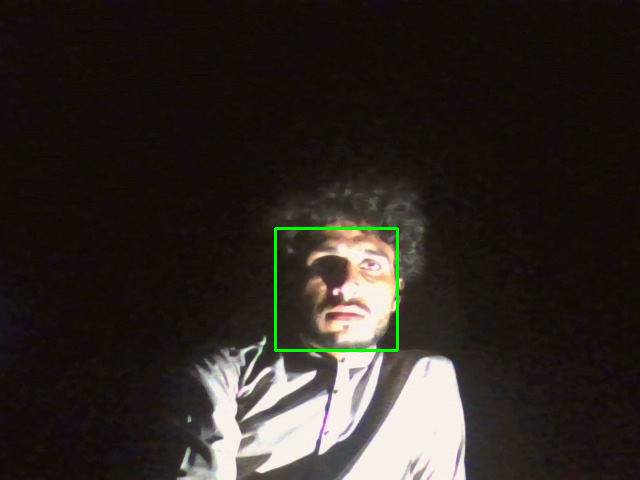

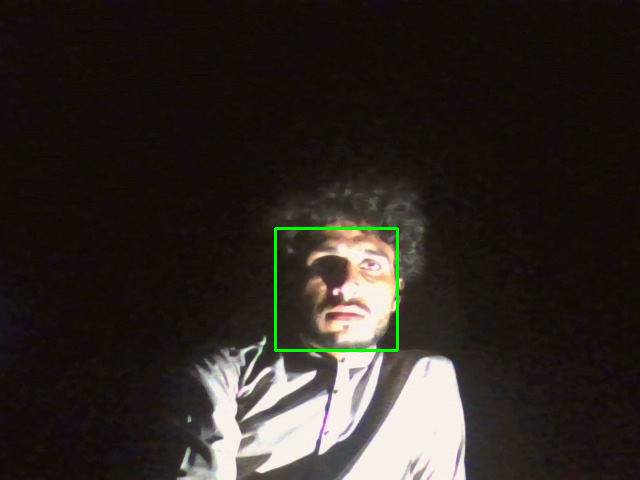

In [71]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to capture an image from the webcam
def capture_image():
    js = Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Create a canvas and draw the current video frame onto it
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            video.remove();
            return canvas.toDataURL('image/png');
        }
        captureImage();
    ''')
    display(js)
    data = eval_js('captureImage()')
    return data

# Capture image from webcam
image_data = capture_image()

# Decode the captured image
image_bytes = b64decode(image_data.split(',')[1])
image_array = np.frombuffer(image_bytes, np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform face detection (assuming face_cascade is already loaded)
detections = cnn_face_detector(gray_image, 2)

print("Total faces are: " , len(detections))
# Draw rectangles around detected faces
for d in detections:
    l, t, r, b = d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom()
    cv2.rectangle(image, (l, t), (r, b), (0, 255, 0), 2)
cv2_imshow(image)

# Display the image with detections
cv2_imshow(image)
